# HomeWork 2

# Matthew Anderson | 801203905

# Github https://github.com/Mand187/Intro-to-ML


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
## CSV/Data Processing ##

url = "https://raw.githubusercontent.com/Mand187/Intro-to-ML/master/Data/Housing.csv"
hf = pd.read_csv(url)

# Display the first 5 rows of the DataFrame
print(hf.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [ ]:
# Binary mapping function
def binary_mapping(df, variable_list):
    df[variable_list] = df[variable_list].apply(lambda x: x.map({'no': 0, 'yes': 1}))
    return df

# Preprocessing function
def preprocess_data(df):
    variable_list = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
    df = binary_mapping(df, variable_list)
    df = df.drop('furnishingstatus', axis=1)
    return df

# Preprocess the data
hf = preprocess_data(hf)

# Data Splitting
df_training, df_validation = train_test_split(hf, train_size=0.8, test_size=0.2, random_state=100)

# Scaling Function
def scale_data(train_data, valid_data):
    minmax_scaler = MinMaxScaler()
    std_scaler = StandardScaler()

    norm_train = pd.DataFrame(minmax_scaler.fit_transform(train_data), columns=train_data.columns)
    norm_valid = pd.DataFrame(minmax_scaler.transform(valid_data), columns=valid_data.columns)

    std_train = pd.DataFrame(std_scaler.fit_transform(train_data), columns=train_data.columns)
    std_valid = pd.DataFrame(std_scaler.transform(valid_data), columns=valid_data.columns)

    return norm_train, norm_valid, std_train, std_valid

# Scale the data
norm_training, norm_validation, std_training, std_validation = scale_data(df_training, df_validation)

# Prepare output variables
y_train = df_training.pop('price')
y_valid = df_validation.pop('price')

# Model Training
def train_model(inputs, x_training, x_validation, y_train, y_valid, learning_rate, lambd, iterations):
    x_train = np.c_[np.ones((len(x_training), 1)), x_training[inputs].values]
    x_valid = np.c_[np.ones((len(x_validation), 1)), x_validation[inputs].values]

    n = x_train.shape[1]
    m_train = len(x_train)
    m_valid = len(x_valid)
    theta = np.zeros(n)

    train_losses = []
    valid_losses = []

    for i in range(iterations):
        h_theta = x_train.dot(theta)
        error = h_theta - y_train.values
        gradient = (1 / m_train) * (x_train.T.dot(error))

        # Update theta with regularization
        theta = theta * (1 - learning_rate * (lambd / m_train)) - (learning_rate * gradient)

        # Calculate losses
        train_loss = (1 / (2 * m_train)) * np.sum(np.square(error))
        valid_loss = (1 / (2 * m_valid)) * np.sum(np.square(x_valid.dot(theta) - y_valid.values))

        train_losses.append(train_loss)
        valid_losses.append(valid_loss)

    return train_losses, valid_losses, theta

# Plotting Function
def plot_losses(norm_losses, std_losses, learning_rates):
    plt.figure(figsize=(10, 8))
    plt.suptitle('Linear Regression Model Losses', fontsize=16)

    for i, lr in enumerate(learning_rates):
        plt.subplot(3, 2, i * 2 + 1)
        plt.plot(norm_losses[i][0], label="Normalized Training Loss")
        plt.plot(norm_losses[i][1], label="Normalized Validation Loss")
        plt.xlabel("Iteration")
        plt.ylabel("Loss")
        plt.legend()
        plt.title(f"Loss with Normalized Inputs and Learning Rate {lr}")

        plt.subplot(3, 2, i * 2 + 2)
        plt.plot(std_losses[i][0], label="Standardized Training Loss")
        plt.plot(std_losses[i][1], label="Standardized Validation Loss")
        plt.xlabel("Iteration")
        plt.ylabel("Loss")
        plt.legend()
        plt.title(f"Loss with Standardized Inputs and Learning Rate {lr}")

    plt.tight_layout()
    plt.show()

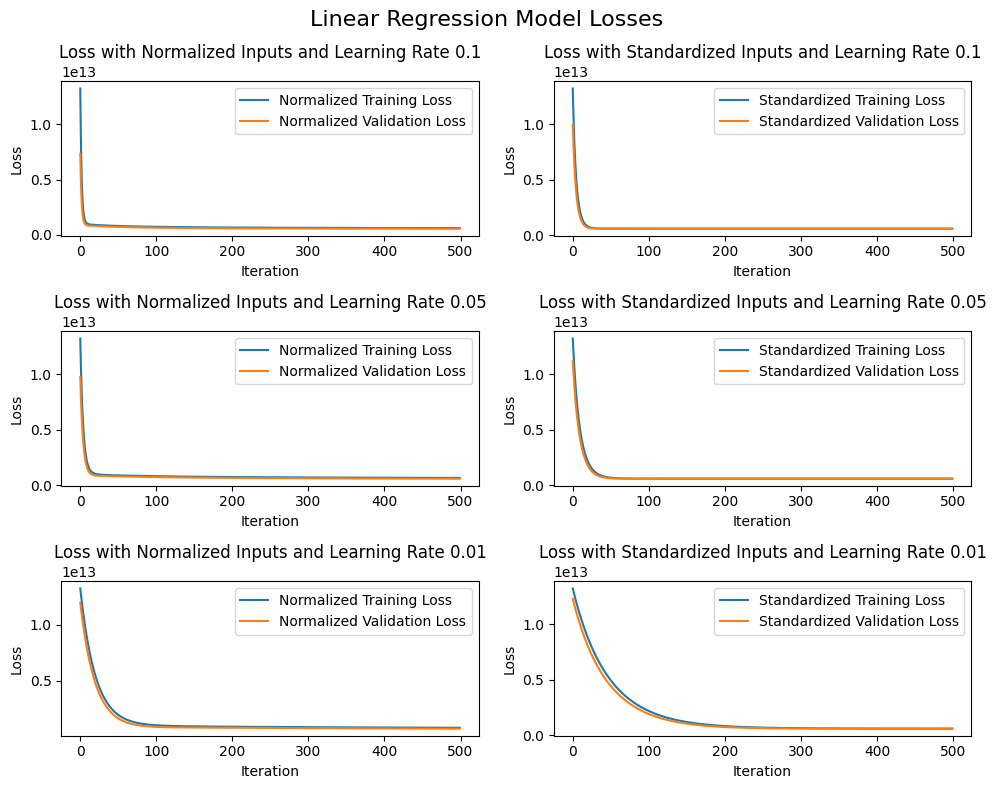

In [ ]:
# Learning rates to test
learning_rates = [0.1, 0.05, 0.01]
lambd = 5
iterations = 500

# Store losses
norm_losses = []
std_losses = []

for lr in learning_rates:
    norm_losses.append(train_model(df_training.columns.tolist(), norm_training, norm_validation, y_train, y_valid, lr, lambd, iterations))
    std_losses.append(train_model(df_training.columns.tolist(), std_training, std_validation, y_train, y_valid, lr, lambd, iterations))

# Plot losses
plot_losses(norm_losses, std_losses, learning_rates)